In [2]:
# 5-1 初始化环境并玩一步

import gym
import numpy as np
import matplotlib.pyplot as plt

env = gym.make('Taxi-v3')
state = env.reset()
taxirow, taxicol, passloc, destidx = env.unwrapped.decode(state)
print(taxirow, taxicol, passloc, destidx)
print('出租车位置 = {}'.format((taxirow, taxicol)))
print('乘客位置 = {}'.format(env.unwrapped.locs[passloc]))
print('目标位置 = {}'.format(env.unwrapped.locs[destidx]))
env.render()
env.step(1)

2 3 0 1
出租车位置 = (2, 3)
乘客位置 = (0, 0)
目标位置 = (0, 4)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



(161, -1, False, {'prob': 1.0})

In [23]:
# 5-2 SARSA算法智能体的实现

class SARSAAgent:
    def __init__(self, env, gamma=0.9, learning_rate=0.1, epsilon=0.01) -> None:
        self.gamma = gamma
        self.learning_rate = learning_rate
        self.epsilon = epsilon
        self.action_n = env.action_space.n
        self.q = np.zeros((env.observation_space.n, env.action_space.n))

    def decide(self, state):
        if np.random.uniform() > self.epsilon:
            action = self.q[state].argmax()
        else:
            action = np.random.randint(self.action_n)
        return action

    def learn(self, state, action, reward, next_state, done, next_action):
        u = reward + self.gamma * self.q[next_state][next_action] * (1. - done)
        td_error = u - self.q[state][action]
        self.q[state, action] += self.learning_rate * td_error


agent = SARSAAgent(env)


In [28]:
# 5-3 SARSA智能体与环境交互一回合

def play_sarsa(env, agent, train=False, render=False):
    episode_reward = 0
    observation = env.reset()
    action = agent.decide(observation)
    while True:
        if render:
            env.render()
        next_observation, reward, done, _ = env.step(action)
        episode_reward += reward
        next_action = agent.decide(next_observation)

        # 训练阶段，调用agent.learn更新self.q
        if train:
            agent.learn(observation, action, reward, next_observation, done, next_action)
        
        if done:
            break

        observation, action = next_observation, next_action
    
    return episode_reward



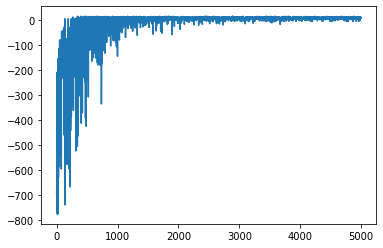

In [23]:
# 5-4 训练SARSA算法

episodes = 5000
episode_rewards = []
for episode in range(episodes):
    episode_reward = play_sarsa(env, agent, train=True)
    episode_rewards.append(episode_reward)
plt.plot(episode_rewards)

In [25]:
# 5-5 测试SARSA算法

agent.epsilon = 0. # 取消探索
episode_rewards = [play_sarsa(env, agent) for _ in range(100)]
print('平均回合奖励 = {} / {} = {}'.format(sum(episode_rewards), len(episode_rewards), np.mean(episode_rewards)))

import pandas as pd

# 最优价值估计
print(pd.DataFrame(agent.q))

# 最优策略估计
policy = np.eye(agent.action_n)[agent.q.argmax(axis=-1)]
print(pd.DataFrame(policy))


平均回合奖励 = 804 / 100 = 8.04


In [9]:
# 5-6 期望SARSA算法智能体

class ExpectedSARSAAgent:
    def __init__(self, env, gamma=0.9, learning_rate=0.1, epsilon=0.01) -> None:
        self.gamma = gamma
        self.learning_rate = learning_rate
        self.epsilon = epsilon
        self.action_n = env.action_space.n
        self.q = np.zeros((env.observation_space.n, env.action_space.n))

    def decide(self, state):
        if np.random.uniform() > self.epsilon:
            action = self.q[state].argmax()
        else:
            action = np.random.randint(self.action_n)
        return action

    def learn(self, state, action, reward, next_state, done):
        v = (self.q[next_state].mean() * self.epsilon + self.q[next_state].max() * (1. - self.epsilon))
        u = reward + self.gamma * v * (1. - done)
        td_error = u - self.q[state][action]
        self.q[state, action] += self.learning_rate * td_error


agent = ExpectedSARSAAgent(env)

In [7]:
# 5-7 Q学习智能体与环境的交互（期望SARSA智能体也用该函数交互）

def play_qlearning(env, agent, train=False, render=False):   
    episode_reward = 0
    observation = env.reset()
    while True:
        if render:
            env.render()
        action = agent.decide(observation)
        next_observation, reward, done, _ = env.step(action)
        episode_reward += reward
        if train:
            agent.learn(observation, action, reward, next_observation, done) 
        if done:
            break
        observation = next_observation
    return episode_reward


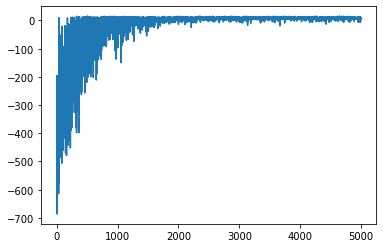

In [10]:
# 5-8 训练期望SARSA算法

episodes = 5000
episode_rewards = []
for episode in range(episodes):
    episode_reward = play_qlearning(env, agent, train=True)
    episode_rewards.append(episode_reward)

plt.plot(episode_rewards)

In [11]:
# 5-9 测试期望SARSA算法

agent.epsilon = 0. # 取消探索
episode_rewards = [play_qlearning(env, agent) for _ in range(100)]
print('平均回合奖励 = {} / {} = {}'.format(sum(episode_rewards), len(episode_rewards), np.mean(episode_rewards)))

平均回合奖励 = 383 / 100 = 3.83


In [12]:
# 5-10 Q学习智能体

class QLearningAgent:
    def __init__(self, env, gamma=0.9, learning_rate=0.1, epsilon=0.01) -> None:
        self.gamma = gamma
        self.learning_rate = learning_rate
        self.epsilon = epsilon
        self.action_n = env.action_space.n
        self.q = np.zeros((env.observation_space.n, env.action_space.n))

    def decide(self, state):
        if np.random.uniform() > self.epsilon:
            action = self.q[state].argmax()
        else:
            action = np.random.randint(self.action_n)
        return action

    def learn(self, state, action, reward, next_state, done):
        u = reward + self.gamma * self.q[next_state].max() * (1. - done)
        td_error = u - self.q[state][action]
        self.q[state, action] += self.learning_rate * td_error

agent = QLearningAgent(env)

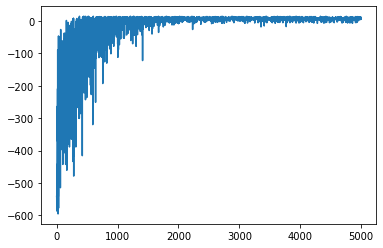

In [13]:
# 训练QLearning

episodes = 5000
episode_rewards = []
for episode in range(episodes):
    episode_reward = play_qlearning(env, agent, train=True)
    episode_rewards.append(episode_reward)

plt.plot(episode_rewards)

In [14]:
# 测试QLearning

agent.epsilon = 0. # 取消探索
episode_rewards = [play_qlearning(env, agent) for _ in range(100)]
print('平均回合奖励 = {} / {} = {}'.format(sum(episode_rewards), len(episode_rewards), np.mean(episode_rewards)))

平均回合奖励 = 778 / 100 = 7.78


In [20]:
# 5-10 Q学习智能体

class DoubleQLearningAgent:
    def __init__(self, env, gamma=0.9, learning_rate=0.1, epsilon=0.01) -> None:
        self.gamma = gamma
        self.learning_rate = learning_rate
        self.epsilon = epsilon
        self.action_n = env.action_space.n
        self.q0 = np.zeros((env.observation_space.n, env.action_space.n))
        self.q1 = np.zeros((env.observation_space.n, env.action_space.n))

    def decide(self, state):
        if np.random.uniform() > self.epsilon:
            action = (self.q0 + self.q1)[state].argmax()
        else:
            action = np.random.randint(self.action_n)
        return action

    def learn(self, state, action, reward, next_state, done):
        if np.random.randint(2):
            self.q0, self.q1 = self.q1, self.q0
        a = self.q0[next_state].argmax()
        u = reward + self.gamma * self.q1[next_state, a] * (1. - done)
        td_error = u - self.q0[state][action]
        self.q0[state, action] += self.learning_rate * td_error

agent = DoubleQLearningAgent(env)

平均回合奖励 = -3834 / 100 = -38.34


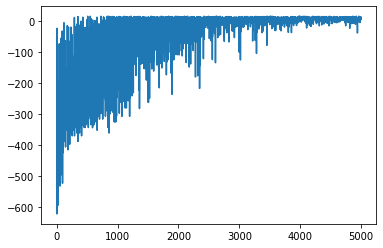

In [21]:
# 训练DoubleQLearning

episodes = 5000
episode_rewards = []
for episode in range(episodes):
    episode_reward = play_qlearning(env, agent, train=True)
    episode_rewards.append(episode_reward)

plt.plot(episode_rewards)


# 测试DoubleQLearning

agent.epsilon = 0. # 取消探索
episode_rewards = [play_qlearning(env, agent) for _ in range(100)]
print('平均回合奖励 = {} / {} = {}'.format(sum(episode_rewards), len(episode_rewards), np.mean(episode_rewards)))

In [30]:
# 5-12 SARSA(λ)算法智能体类

class SARSALambdaAgent(SARSAAgent):
    def __init__(self, env, lambd=0.5, beta=1., gamma=0.9, learning_rate=0.1, epsilon=0.1) -> None:
        super().__init__(env, gamma=gamma, learning_rate=learning_rate, epsilon=epsilon)
        self.lambd = lambd
        self.beta = beta
        self.e = np.zeros((env.observation_space.n, env.action_space.n))

    def learn(self, state, action, reward, next_state, done, next_action):
        # 更新资格迹
        self.e *= (self.lambd * self.gamma)
        self.e[state, action] = 1. + self.beta * self.e[state, action]

        # 更新价值
        u = reward + self.gamma * self.q[next_state, next_action] * (1. - done)
        td_error = u - self.q[state, action]
        self.q += self.learning_rate * self.e * td_error

        # 为下一回合初始化资格迹
        if done:
            self.e *= 0.


agent = SARSALambdaAgent(env)

平均回合奖励 = -461 / 100 = -4.61


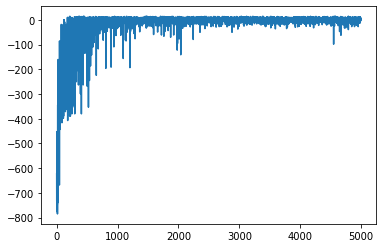

In [32]:
# 训练 测试 资格迹 

episodes = 5000
episode_rewards = []
for episode in range(episodes):
    episode_reward = play_sarsa(env, agent, train=True)
    episode_rewards.append(episode_reward)

plt.plot(episode_rewards)

agent.epsilon = 0. # 取消探索
episode_rewards = [play_sarsa(env, agent) for _ in range(100)]
print('平均回合奖励 = {} / {} = {}'.format(sum(episode_rewards), len(episode_rewards), np.mean(episode_rewards)))